# Recommendation System project - Amazon product's recommendation

Problem Statement -

Build your own recommendation system for products on an e-commerce website like Amazon.com.

Dataset Link - https://drive.google.com/file/d/1ClBptsK3V5KgKXtK2GSRzFNAW7GnTPDW/view?usp=sharing

 

Dataset columns - first three columns are userId, productId, and ratings and the fourth column is timestamp. You can discard the timestamp column as in this case you may not need to use it.

Source - Amazon Reviews data (http://jmcauley.ucsd.edu/data/amazon/)  The repository has several datasets. For this case study, we are using the Electronics dataset.

 

Please do the analysis based on steps( 1 to 8) as given below - 

Steps -

1. Read and explore the given dataset.  ( Rename column/add headers, plot histograms, find data characteristics)
2. Take a subset of the dataset to make it less sparse/ denser. ( For example, keep the users only who has given 50 or more number of ratings )
3. Split the data randomly into train and test dataset. ( For example, split it in 70/30 ratio)
4. Build Popularity Recommender model.
5. Build Collaborative Filtering model.
6. Evaluate both the models. ( Once the model is trained on the training data, it can be used to compute the error (like RMSE) on predictions made on the test data.) You can also use a different method to evaluate the models.
7. Get top - K ( K = 5) recommendations. Since our goal is to recommend new products to each user based on his/her habits, we will recommend 5 new products.
8. Summarise your insights.

###### 1. Read and explore the given dataset.  ( Rename column/add headers, plot histograms, find data characteristics)

In [61]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import collections

In [3]:
electronics=pd.read_csv('ratings_Electronics.csv',  names = ['UserId','ProductId','Ratings','Timestamp'] )

In [4]:
electronics.head()

,UserId,ProductId,Ratings,Timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


In [5]:
electronics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824482 entries, 0 to 7824481
Data columns (total 4 columns):
UserId       object
ProductId    object
Ratings      float64
Timestamp    int64
dtypes: float64(1), int64(1), object(2)
memory usage: 238.8+ MB


In [6]:
users=pd.DataFrame(electronics.groupby('UserId')['Ratings'].count().sort_values(ascending=False))

In [7]:
users.head()

,Ratings
UserId,
A5JLAU2ARJ0BO,520
ADLVFFE4VBT8,501
A3OXHLG6DIBRW8,498
A6FIAB28IS79,431
A680RUE1FDO8B,406


In [8]:
users.reset_index(inplace=True)

In [9]:
users.columns=['UserId','RatingCount']

In [10]:
users.head()

,UserId,RatingCount
0,A5JLAU2ARJ0BO,520
1,ADLVFFE4VBT8,501
2,A3OXHLG6DIBRW8,498
3,A6FIAB28IS79,431
4,A680RUE1FDO8B,406


In [11]:
users.nunique()

UserId         4201696
RatingCount        215
dtype: int64

###### 2.Take a subset of the dataset to make it less sparse/ denser. ( For example, keep the users only who has given 50 or more number of ratings )

In [12]:
users=users[users['RatingCount']>=50]

In [13]:
users.nunique()

UserId         1540
RatingCount     166
dtype: int64

In [14]:
users.head()

,UserId,RatingCount
0,A5JLAU2ARJ0BO,520
1,ADLVFFE4VBT8,501
2,A3OXHLG6DIBRW8,498
3,A6FIAB28IS79,431
4,A680RUE1FDO8B,406


In [15]:
sample_data = pd.merge(electronics, users, on='UserId')  

In [16]:
sample_data.nunique()

UserId          1540
ProductId      48190
Ratings            5
Timestamp       4600
RatingCount      166
dtype: int64

In [17]:
sample_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125871 entries, 0 to 125870
Data columns (total 5 columns):
UserId         125871 non-null object
ProductId      125871 non-null object
Ratings        125871 non-null float64
Timestamp      125871 non-null int64
RatingCount    125871 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.8+ MB


In [18]:
sample_data['ProductId'].nunique()

48190

Dropping Timestamp and RatingCount column as it is not needed now. 

In [19]:
sample_data.drop(columns=['Timestamp','RatingCount'],inplace=True)

In [20]:
sample_data.head()

,UserId,ProductId,Ratings
0,A3BY5KCNQZXV5U,0594451647,5.0
1,A3BY5KCNQZXV5U,B00000JD4V,4.0
2,A3BY5KCNQZXV5U,B000063574,5.0
3,A3BY5KCNQZXV5U,B0000CDJP8,5.0
4,A3BY5KCNQZXV5U,B0007Y794O,5.0


In [82]:
sample_data['UserId'].value_counts()

A5JLAU2ARJ0BO     520
ADLVFFE4VBT8      501
A3OXHLG6DIBRW8    498
A6FIAB28IS79      431
A680RUE1FDO8B     406
A1ODOGXEYECQQ8    380
A36K2N527TXXJN    314
A2AY4YUOX2N1BQ    311
AWPODHOB4GFWL     308
A25C2M3QF9G7OQ    296
ARBKYIVNYWK3C     296
A22CW0ZHY3NJH8    292
A38RMU1Y5TDP9     282
A3EXWV8FNSSFL6    282
A3LGT6UZL99IW1    279
A2NOW4U7W3F7RI    277
A23GFTVIETX7DS    270
A3PD8JD9L4WEII    266
A17BUUBOU0598B    261
A3AYSYSLHU26U9    257
A2XRMQA6PJ5ZJ8    253
A231WM2Z2JL0U3    252
A12DQZKRKTNF5E    252
A1UQBFCERIP7VJ    247
AGVWTYW0ULXHT     244
A203OCQQ12MAVT    240
AEJAGHLC675A7     239
A2NYK9KWFMJV4Y    238
A3A4ZAIBQWKOZS    236
A3CW0ZLUO5X2B1    227
                 ... 
A1C5TCCR2IGKBU     50
A2AFTRU43PY9P5     50
A3SP7T2PZ3HSDE     50
A1IU4UAV9QIJAI     50
A2RGA7UGAN3UL7     50
A19N3S7CBSU6O7     50
A11KQADBYE0UZL     50
AMO1MLSIJSQOF      50
A2ZGDHLJ85T6AD     50
A3HH340REI4J47     50
A7Z2J9V37ABCO      50
A3QD59N3M7O7KB     50
A1USYP4AXF5I1D     50
A1PS4OYWUB0VX      50
A3HC7NWLKC

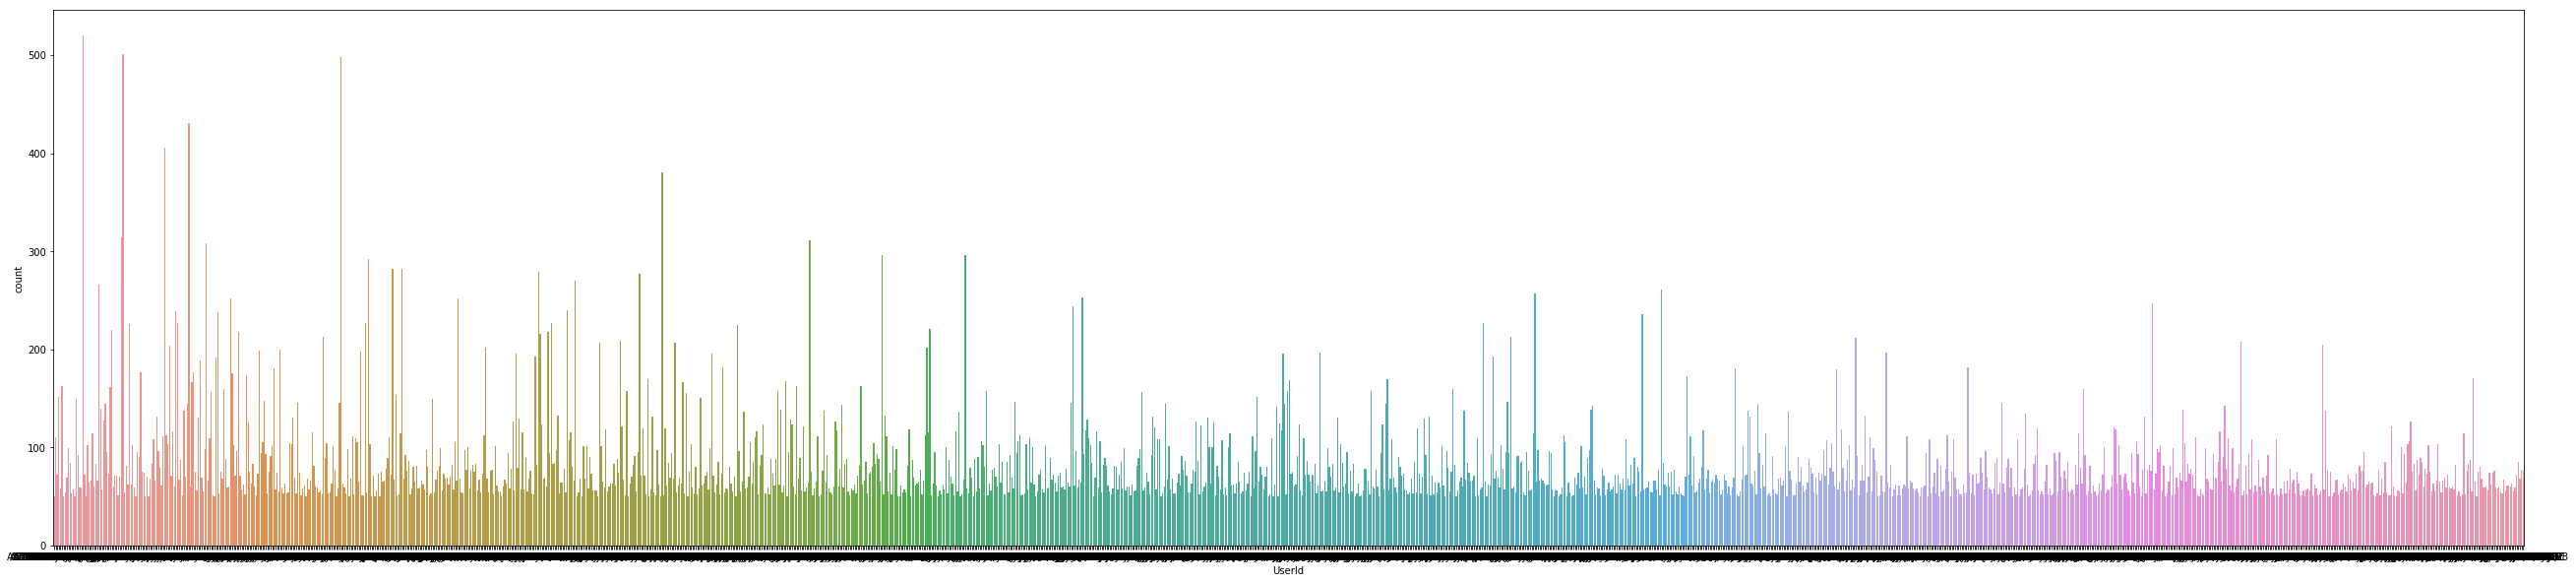

In [83]:
plt.figure(figsize=(45,10))
sns.countplot(sample_data['UserId'])

We can see that out of 48190 products, each user on an average gave ratings to ~100 products.  

In [72]:
sample_data['ProductId'].value_counts()

B0088CJT4U    206
B003ES5ZUU    184
B000N99BBC    167
B007WTAJTO    164
B00829TIEK    149
B00829THK0    137
B008DWCRQW    137
B002R5AM7C    128
B004CLYEDC    118
B002SZEOLG    113
B00834SJNA    110
B004T9RR6I    109
B002V88HFE    106
B0034CL2ZI    106
B00834SJSK    101
B002WE6D44    100
B00829TIA4     99
B004CLYEFK     97
B009SYZ8OC     95
B0079UAT0A     92
B0019EHU8G     90
B005CT56F8     87
B00DR0PDNE     84
B000QUUFRW     84
B00HFRWWAM     82
B005FYNSPK     81
B004CLYEE6     80
B0041Q38NU     79
B00ARB5FLQ     78
B001TH7GUU     78
             ... 
B000MX1LXA      1
B000234W04      1
B000I97G4Q      1
B00C0KOSIS      1
B00AX9ZA80      1
B009GGS4AW      1
B0009JP6R4      1
B000066E77      1
B004V419XS      1
B004U000QA      1
B001253842      1
B009GUXWDM      1
B001OC1NM2      1
B002SCNDIE      1
B00005V7L8      1
B000NJHC0E      1
B007KZT1SA      1
B0049QIB1G      1
B00CSMMR4K      1
B00IN6UREC      1
B001BHP22C      1
B002YVAT72      1
B0051GN90G      1
B001XCWLQK      1
B004YIFOPK

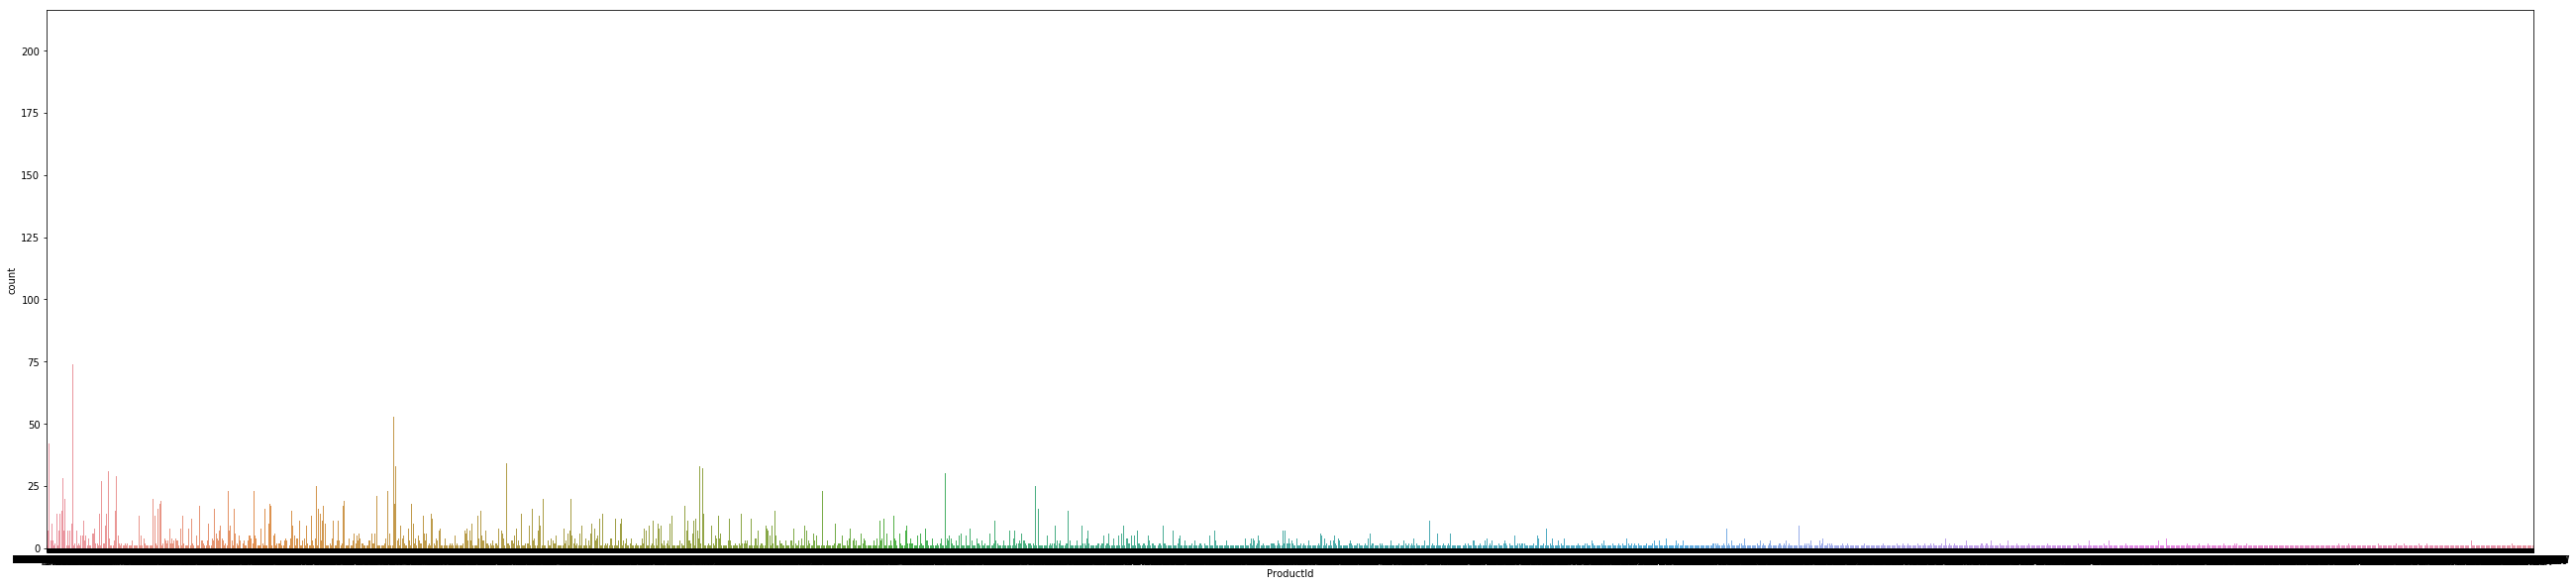

In [73]:
plt.figure(figsize=(45,10))
sns.countplot(sample_data['ProductId'])

We can see that out of 1540 users, on an average ~20 users gave ratings to each product.  

In [74]:
sample_data['Ratings'].value_counts()

5.0    71034
4.0    32295
3.0    12060
2.0     5367
1.0     5115
Name: Ratings, dtype: int64

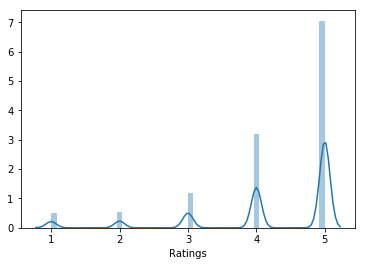

In [75]:
sns.distplot(sample_data['Ratings'])

We can see that most of the users gave 5 rating. 

###### Popularity Based Recommender system:

In [21]:
sample_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125871 entries, 0 to 125870
Data columns (total 3 columns):
UserId       125871 non-null object
ProductId    125871 non-null object
Ratings      125871 non-null float64
dtypes: float64(1), object(2)
memory usage: 3.8+ MB


In [22]:
sample_data.head()

,UserId,ProductId,Ratings
0,A3BY5KCNQZXV5U,0594451647,5.0
1,A3BY5KCNQZXV5U,B00000JD4V,4.0
2,A3BY5KCNQZXV5U,B000063574,5.0
3,A3BY5KCNQZXV5U,B0000CDJP8,5.0
4,A3BY5KCNQZXV5U,B0007Y794O,5.0


In [23]:
ratings_mean_count = pd.DataFrame(sample_data.groupby('ProductId')['Ratings'].mean()) 

In [24]:
ratings_mean_count.head()

,Ratings
ProductId,
0594451647,5.000000
0594481813,3.000000
0970407998,2.500000
0972683275,4.750000
1400501466,3.333333


In [25]:
ratings_mean_count['rating_counts'] = pd.DataFrame(sample_data.groupby('ProductId')['Ratings'].count())  

In [26]:
ratings_mean_count.head()

,Ratings,rating_counts
ProductId,,
0594451647,5.000000,1
0594481813,3.000000,1
0970407998,2.500000,2
0972683275,4.750000,4
1400501466,3.333333,6


In [27]:
ratings_mean_count.sort_values(by=['Ratings','rating_counts'], ascending=False).head(5)

,Ratings,rating_counts
ProductId,,
B000FQ2JLW,5.0,19
B00ISFNSBW,5.0,18
B000IJY8DS,5.0,17
B001TH7GUA,5.0,17
B00HZWJGS8,5.0,17


In [28]:
ratings_mean_count.sort_values(by=['rating_counts','Ratings'], ascending=False).head(5)

,Ratings,rating_counts
ProductId,,
B0088CJT4U,4.218447,206
B003ES5ZUU,4.864130,184
B000N99BBC,4.772455,167
B007WTAJTO,4.701220,164
B00829TIEK,4.436242,149


Just adding a filter criteria that products should be rated atleast by 25 users to get it recommended. 

In [37]:
ProductsRatedByAtleast25 = ratings_mean_count[ratings_mean_count['rating_counts']>=25]

In [38]:
ProductsRatedByAtleast25.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397 entries, B00004ZCJE to B00K91DB7Y
Data columns (total 2 columns):
Ratings          397 non-null float64
rating_counts    397 non-null int64
dtypes: float64(1), int64(1)
memory usage: 9.3+ KB


###### 4. Top 5 popularity based recommendation:

In [40]:
ProductsRatedByAtleast25.sort_values(by=['Ratings'], ascending=False).head(5)

,Ratings,rating_counts
ProductId,,
B0052SCU8U,4.979592,49
B003ES5ZR8,4.933333,30
B001TH7T2U,4.925000,40
B005ES0YYA,4.923077,26
B003FVJYF8,4.920000,25


### Collaborative filtering model:

We will use these products only for our collaborative filtering models which were rated atleast by 25 users. 

In [41]:
ProductsRatedByAtleast25.index

Index(['B00004ZCJE', 'B00005LEN4', 'B00005T3G0', 'B000067RT6', 'B00006B7DA',
       'B00006JN3G', 'B00006RVPW', 'B00007E7JU', 'B00007EDZG', 'B00007KDVI',
       ...
       'B00HRQB28Y', 'B00HSQAIQU', 'B00HVT27B8', 'B00IL7B2YM', 'B00IVFDZBC',
       'B00IX2VGFA', 'B00JC5Y6WM', 'B00JF0D7RE', 'B00JP12170', 'B00K91DB7Y'],
      dtype='object', name='ProductId', length=397)

In [43]:
sample_data2 =sample_data[sample_data['ProductId'].isin(ProductsRatedByAtleast25.index)]

In [44]:
sample_data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16666 entries, 8 to 125863
Data columns (total 3 columns):
UserId       16666 non-null object
ProductId    16666 non-null object
Ratings      16666 non-null float64
dtypes: float64(1), object(2)
memory usage: 520.8+ KB


In [45]:
sample_data2.nunique()

UserId       1493
ProductId     397
Ratings         5
dtype: int64

In [74]:
sample_data2.head()

,UserId,ProductId,Ratings
8,A3BY5KCNQZXV5U,B000QUUFRW,5.0
19,A3BY5KCNQZXV5U,B003VAHYNC,5.0
26,A3BY5KCNQZXV5U,B004NY9UV4,4.0
32,A3BY5KCNQZXV5U,B005FYNSPK,4.0
37,A3BY5KCNQZXV5U,B0071BTJPI,5.0


###### 3. Splitting the data into train and test

In [134]:
from surprise import KNNWithMeans
from surprise import Dataset
from surprise import Reader
from surprise import accuracy
from surprise.model_selection import train_test_split
reader = Reader (rating_scale=(1,5))

In [135]:
data = Dataset.load_from_df(sample_data2,reader)
trainset, testset = train_test_split(data, test_size=.30,random_state=1)

###### 5. User-User Collaborative Model

In [136]:
algo = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': True})
algo.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [137]:
# run the trained model against the testset
test_pred = algo.test(testset)

In [138]:
test_pred

[Prediction(uid='A2UEB48LAWFUCW', iid='B00EXPNFQO', r_ui=4.0, est=4.1923076923076925, details={'actual_k': 1, 'was_impossible': False}),
 Prediction(uid='A215WH6RUDUCMP', iid='B00DTZYHX4', r_ui=5.0, est=4.96970778621744, details={'actual_k': 2, 'was_impossible': False}),
 Prediction(uid='AAXAKFQEAQPWC', iid='B001XURP7W', r_ui=5.0, est=4.833333333333333, details={'actual_k': 1, 'was_impossible': False}),
 Prediction(uid='A3EZEP0FX5BC1P', iid='B004CLYEDC', r_ui=4.0, est=4.588723623890147, details={'actual_k': 8, 'was_impossible': False}),
 Prediction(uid='A36K2N527TXXJN', iid='B00F0DD0I6', r_ui=5.0, est=5, details={'actual_k': 4, 'was_impossible': False}),
 Prediction(uid='A1CPRP3VFJRS1R', iid='B0092MD8OW', r_ui=5.0, est=4.3, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A3BKNXX8QFIXIV', iid='B00BOHNYTW', r_ui=5.0, est=4.550513387997816, details={'actual_k': 6, 'was_impossible': False}),
 Prediction(uid='A2V5M5EJPOD2IU', iid='B003XIJ3MW', r_ui=5.0, est=5, details={'

In [139]:
# get RMSE
print("User-based Model : Test Set")
accuracy.rmse(test_pred, verbose=True)

User-based Model : Test Set
RMSE: 0.9973


0.9973056357486982

###### Item- Item Collaborative model

In [54]:
algo_item = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': False})
algo_item.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [55]:
# run the trained model against the testset
test_pred_item = algo_item.test(testset)

In [56]:
test_pred_item

[Prediction(uid='A2UEB48LAWFUCW', iid='B00EXPNFQO', r_ui=4.0, est=3.325864451925222, details={'actual_k': 3, 'was_impossible': False}),
 Prediction(uid='A215WH6RUDUCMP', iid='B00DTZYHX4', r_ui=5.0, est=4.103359501192228, details={'actual_k': 2, 'was_impossible': False}),
 Prediction(uid='AAXAKFQEAQPWC', iid='B001XURP7W', r_ui=5.0, est=4.958592132505176, details={'actual_k': 1, 'was_impossible': False}),
 Prediction(uid='A3EZEP0FX5BC1P', iid='B004CLYEDC', r_ui=4.0, est=4.712442838264917, details={'actual_k': 8, 'was_impossible': False}),
 Prediction(uid='A36K2N527TXXJN', iid='B00F0DD0I6', r_ui=5.0, est=5, details={'actual_k': 5, 'was_impossible': False}),
 Prediction(uid='A1CPRP3VFJRS1R', iid='B0092MD8OW', r_ui=5.0, est=1, details={'actual_k': 1, 'was_impossible': False}),
 Prediction(uid='A3BKNXX8QFIXIV', iid='B00BOHNYTW', r_ui=5.0, est=4.997561702043583, details={'actual_k': 4, 'was_impossible': False}),
 Prediction(uid='A2V5M5EJPOD2IU', iid='B003XIJ3MW', r_ui=5.0, est=5, details={'ac

In [58]:
# get RMSE
print("Item-based Model : Test Set")
accuracy.rmse(test_pred_item, verbose=True)

Item-based Model : Test Set
RMSE: 0.9693


0.9693405641855939

###### 6. Evaluate both the models:

If we see the RMSE score for both the models, Item based model has less error. That means item based collaborative model is more accurate. 

###### 7. Get top - K ( K = 5) recommendations. Since our goal is to recommend new products to each user based on his/her habits, we will recommend 5 new products

In [62]:
def get_top_k(predictions, k=5):
    #First map the predictions to each other.
    top_k = collections.defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_k[uid].append((iid,est))
        
    #Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_k.items():
        user_ratings.sort(key=lambda x:x[1], reverse=True)
        top_k[uid] = user_ratings[:k]
        
    return top_k

Using User-user collaboration

In [66]:
top_k = get_top_k(test_pred, k=5)

In [67]:
top_k

defaultdict(list,
            {'A2UEB48LAWFUCW': [('B00EXPNFQO', 4.1923076923076925),
              ('B00D3F7D7M', 4.136363636363637),
              ('B00DDK1QUC', 4.115630656542794),
              ('B004TKTOWC', 3.907940525720675),
              ('B00DIOALPE', 3.892635213969681)],
             'A215WH6RUDUCMP': [('B00DTZYHX4', 4.96970778621744),
              ('B0082E9K7U', 4.696580456063206),
              ('B008MF3X9K', 4.51861521745803),
              ('B0097CXWUW', 4.444696243565272),
              ('B007BY0MIS', 3.7073981394515565)],
             'AAXAKFQEAQPWC': [('B001XURP7W', 4.833333333333333),
              ('B001TH7GVE', 4.833333333333333),
              ('B005HMKKH4', 4.833333333333333),
              ('B001T9NUJE', 4.833333333333333),
              ('B003ES5ZUU', 4.679487179487179)],
             'A3EZEP0FX5BC1P': [('B00BOHNYTW', 4.850353041305472),
              ('B004CLYEDC', 4.588723623890147),
              ('B006DEBYWU', 4.5768517596524685),
              ('B004CLYEH

In [68]:
# Print the recommended items for each user
for uid, user_ratings in top_k.items():
    print(uid, [iid for (iid, _) in user_ratings])

A2UEB48LAWFUCW ['B00EXPNFQO', 'B00D3F7D7M', 'B00DDK1QUC', 'B004TKTOWC', 'B00DIOALPE']
A215WH6RUDUCMP ['B00DTZYHX4', 'B0082E9K7U', 'B008MF3X9K', 'B0097CXWUW', 'B007BY0MIS']
AAXAKFQEAQPWC ['B001XURP7W', 'B001TH7GVE', 'B005HMKKH4', 'B001T9NUJE', 'B003ES5ZUU']
A3EZEP0FX5BC1P ['B00BOHNYTW', 'B004CLYEDC', 'B006DEBYWU', 'B004CLYEH8', 'B005CT56F8']
A36K2N527TXXJN ['B00F0DD0I6', 'B00EOE4G4E', 'B00DTZYHX4', 'B0082E9K7U', 'B00BOHNYTW']
A1CPRP3VFJRS1R ['B000N99BBC', 'B00DDK1QUC', 'B0092MD8OW', 'B007PTCFFW']
A3BKNXX8QFIXIV ['B001TH7GSW', 'B001OOZ1X2', 'B00834SJNA', 'B00BOHNYTW', 'B00DQZOD8Q']
A2V5M5EJPOD2IU ['B003XIJ3MW', 'B001T9NUJE', 'B00452V66G', 'B00829THK0', 'B0034CL2ZI']
A3CW0ZLUO5X2B1 ['B0041OSQ9I', 'B003NR57BY', 'B006I5MKZY', 'B004CLYEFK', 'B0034XRDUA']
AENULRBQ2IE5I ['B004TJ6JH6', 'B000I68BD4', 'B004XC6GJ0']
A2ME89MSWVG9NF ['B009YT6PPC', 'B006RG0QC8', 'B00JP12170', 'B005GM1Q1O']
AO2EURP2Y4JZM ['B002K9IHGI', 'B004CLYEE6', 'B004CLYE8C', 'B0042FZ50O', 'B00HFRWWAM']
A3FEGTOLCWXSV4 ['B001TH7T2U

A2OOLI2WFY4L2 ['B003ES5ZUU', 'B003WUBIZQ']
A18FLOC8YQY0P8 ['B00E3W15P0', 'B007WTAJTO', 'B00D5Q75RC']
A145B8OHVNNFAJ ['B00EXPNFQO', 'B005CLPP84', 'B0063705PE']
A1MJMYLRTZ76ZX ['B002C7481G']
A2VIYTWXANL343 ['B0002L5R78']
A2WBVO6X3KPMDT ['B003FVJYF8']
A20G074MWH9U7O ['B002HWRJBM', 'B00CB2F65O']
AGILRZOT49R0V ['B001TH7GSW']
A1M7HP5CHDXXOU ['B00D429Y12', 'B0043T7FXE', 'B007I5JT4S', 'B00426C57O']
A28LUOEY0ECT9G ['B0041OSQB6']
A32QOZWIKQDNZX ['B003ES5ZUU']
A3O5ASFUXC32UA ['B00005LEN4']
A2XXBZPQT5EXHV ['B00483WRZ6', 'B000BQ7GW8']
A2D1LPEUCTNT8X ['B0053NBLFW']
A1VFX417XDNWIU ['B00829TIA4']
A3JV071KO43Q5X ['B004XC6GJ0', 'B0041OSQB6', 'B00ARB5FLQ']
A27B1U3OWCU14J ['B002TLTE6O']
A1OA2ZW406NQXM ['B002TLTE6O']
A1B0NL8UWAELI7 ['B000067RT6', 'B00007E7JU']
AVJORH3ACR2A5 ['B003ES5ZUU', 'B000MX48VM']
A31HE83MU98GBV ['B0015DYMVO']
A24P4E3RJ6AX94 ['B002V88HFE', 'B003NR57BY', 'B001S4OTS6']
A3CFU12GS5CZCN ['B002V88HFE']
A20WUUD9EDWY4N ['B00004ZCJE']
A3MU9G6YWKTGTA ['B004XC6GJ0']
A2X61KKXXR6WNP ['B00834SJSK']

Using item-item collaboration

In [69]:
top_k_item = get_top_k(test_pred_item, k=5)

In [70]:
top_k_item

defaultdict(list,
            {'A2UEB48LAWFUCW': [('B00D3F7D7M', 4.902564102564103),
              ('B004CLYEH8', 4.062063668093717),
              ('B00DIOALPE', 3.816475526539057),
              ('B00DDK1QUC', 3.7300957757662676),
              ('B004TKTOWC', 3.678692854841259)],
             'A215WH6RUDUCMP': [('B0082E9K7U', 4.958170415433459),
              ('B008MF3X9K', 4.561490981197965),
              ('B0097CXWUW', 4.179707133144115),
              ('B00DTZYHX4', 4.103359501192228),
              ('B007BY0MIS', 3.395860920427144)],
             'AAXAKFQEAQPWC': [('B001T9NUJE', 5),
              ('B001XURP7W', 4.958592132505176),
              ('B001TH7GVE', 4.840847756624358),
              ('B003ES5ZUU', 4.508392902275043),
              ('B005HMKKH4', 4.481206531356439)],
             'A3EZEP0FX5BC1P': [('B00BOHNYTW', 4.92471765527716),
              ('B005CT56F8', 4.897058823529411),
              ('B004CLYEDC', 4.712442838264917),
              ('B00005LEN4', 4.64419475655

In [71]:
# Print the recommended items for each user
for uid, user_ratings in top_k_item.items():
    print(uid, [iid for (iid, _) in user_ratings])

A2UEB48LAWFUCW ['B00D3F7D7M', 'B004CLYEH8', 'B00DIOALPE', 'B00DDK1QUC', 'B004TKTOWC']
A215WH6RUDUCMP ['B0082E9K7U', 'B008MF3X9K', 'B0097CXWUW', 'B00DTZYHX4', 'B007BY0MIS']
AAXAKFQEAQPWC ['B001T9NUJE', 'B001XURP7W', 'B001TH7GVE', 'B003ES5ZUU', 'B005HMKKH4']
A3EZEP0FX5BC1P ['B00BOHNYTW', 'B005CT56F8', 'B004CLYEDC', 'B00005LEN4', 'B00CL8F98W']
A36K2N527TXXJN ['B00F0DD0I6', 'B00DTZYHX4', 'B0082E9K7U', 'B003WUBIZQ', 'B00BOHNYTW']
A1CPRP3VFJRS1R ['B000N99BBC', 'B007PTCFFW', 'B00DDK1QUC', 'B0092MD8OW']
A3BKNXX8QFIXIV ['B001TH7GSW', 'B00BOHNYTW', 'B00834SJNA', 'B001OOZ1X2', 'B00HPM1FZ0']
A2V5M5EJPOD2IU ['B003XIJ3MW', 'B0034CL2ZI', 'B001T9NUJE', 'B00829THK0', 'B00D3F7D7M']
A3CW0ZLUO5X2B1 ['B004Q3R9B0', 'B003NR57BY', 'B0097BEFYA', 'B004CLYEFK', 'B0034XRDUA']
AENULRBQ2IE5I ['B004TJ6JH6', 'B004XC6GJ0', 'B000I68BD4']
A2ME89MSWVG9NF ['B005GM1Q1O', 'B00JP12170', 'B006RG0QC8', 'B009YT6PPC']
AO2EURP2Y4JZM ['B004CLYE8C', 'B00HFRWWAM', 'B002K9IHGI', 'B001CIREXA', 'B0042FZ50O']
A3FEGTOLCWXSV4 ['B008EQZ25K

A35X2JJI49OBZP ['B003L1ZYZ6', 'B008EQZ25K', 'B0043T7FXE', 'B000V1MLBE']
A23WPWLYT3P1CZ ['B002MCZJ78']
A1NMM0RDRF6R84 ['B000QUUFRW', 'B002J9HBIO']
A1D9V11QUHXENQ ['B006ZBWV0K', 'B001F7AHOG', 'B00834SJNA']
A3TP31S61PPE3G ['B004Q3R9B0', 'B004GUT1QO', 'B0097CZHAU']
A1TR1R2QKWRSRA ['B004RORMF6', 'B0093HAWZY', 'B00HPM1G8Q', 'B007Q8GOHM', 'B009WZRCO6']
A34JKODTSKCGEN ['B000N99BBC']
A2G563AC1HME2R ['B00483WRZ6', 'B0002L5R78']
AM8W6Y3HVXLZT ['B000JMJWV2', 'B00884WH74']
AN9WA4C5E7YY5 ['B005CLPP8E']
AI0BCEWRE04G0 ['B000L47AHG', 'B001E1Y5O6']
AZCE11PSTCH1L ['B002NEGTTW']
A2T689YVOAYGGD ['B0036Q7MV0', 'B002QEBMAK']
A3094EPI56GKZ6 ['B0057UUB1G', 'B008X9Z3UC']
A3J3ZHGDUDPCFL ['B002R5AM7C', 'B00EXPNFQO']
A3CLWR1UUZT6TG ['B006QB1RPY', 'B004I5BUSO', 'B00DR0PDNE']
A1ZBEIL78MLR9Z ['B0093HAWZY', 'B009SYZ8OC', 'B0015DYMVO', 'B00HSQAIQU']
A1GBT4UN2RW7XY ['B00D1GYNT4', 'B007I5JT4S', 'B002V88HFE']
A3E68EBGXTWDNP ['B00007EDZG']
A34CSXOGVYF94S ['B001F51G16']
A11R5VW7IM6ISQ ['B006QB1RPY', 'B0041OSQB6', 'B001TH7GU

### 8. Insights:

If we see all three methods we use in this project, Popularity based recommendation is kind of fix recommendation and does not take user preference in consideration.
user-user collaborative filtering model is filtering based on user's ratings for given products. Whereas item item collaborative filering model is filtering based on item's ratings by given users. Predicted result is pretty much same. Out of top 5, ~4 are same in both the models. 
Note: above top 5 recommendation is from the list of products which were already in trainset and rating were given by users already. Hence we see less than 5 products also for few users as it didnt find 5 products which were collaborating with that user or product. 

We will get top 5 recommendation from unrated (new) products for all the users as below.

### Now Getting top - K ( K = 5) recommendations. Since our goal is to recommend new products to each user based on his/her habits, we will recommend 5 new products

First getting the panda DataFrame which has all the products which were not rated by that user from our sample data for cross verification.

In [94]:
User=pd.DataFrame(sample_data2['UserId'].unique(), columns=['UserId'])

In [95]:
Product=pd.DataFrame(sample_data2['ProductId'].unique(), columns=['ProductId'])

In [99]:
def cartesian_product_basic(User, Product):
    return (
       User.assign(key=1).merge(Product.assign(key=1), on='key').drop('key', 1))

Unique_UserProduct = cartesian_product_basic(User, Product)

In [101]:
Unique_UserProduct.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 592721 entries, 0 to 592720
Data columns (total 2 columns):
UserId       592721 non-null object
ProductId    592721 non-null object
dtypes: object(2)
memory usage: 13.6+ MB


In [102]:
Unique_UserProduct.head(10)

,UserId,ProductId
0,A3BY5KCNQZXV5U,B000QUUFRW
1,A3BY5KCNQZXV5U,B003VAHYNC
2,A3BY5KCNQZXV5U,B004NY9UV4
3,A3BY5KCNQZXV5U,B005FYNSPK
4,A3BY5KCNQZXV5U,B0071BTJPI
5,A3BY5KCNQZXV5U,B007PTCFFW
6,A3BY5KCNQZXV5U,B009LL9VDG
7,A3BY5KCNQZXV5U,B00BGGDVOO
8,A3BY5KCNQZXV5U,B00006B7DA
9,A3BY5KCNQZXV5U,B000CRFOMK


In [105]:
Unique_UserProduct['UserProduct']=Unique_UserProduct.UserId+Unique_UserProduct.ProductId

In [120]:
new_UserProduct = Unique_UserProduct[~Unique_UserProduct.UserProduct.isin(sample_data2.UserId+sample_data2.ProductId)]

In [121]:
sample_data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16666 entries, 8 to 125863
Data columns (total 3 columns):
UserId       16666 non-null object
ProductId    16666 non-null object
Ratings      16666 non-null float64
dtypes: float64(1), object(2)
memory usage: 520.8+ KB


In [122]:
sample_data2.head(10)

,UserId,ProductId,Ratings
8,A3BY5KCNQZXV5U,B000QUUFRW,5.0
19,A3BY5KCNQZXV5U,B003VAHYNC,5.0
26,A3BY5KCNQZXV5U,B004NY9UV4,4.0
32,A3BY5KCNQZXV5U,B005FYNSPK,4.0
37,A3BY5KCNQZXV5U,B0071BTJPI,5.0
41,A3BY5KCNQZXV5U,B007PTCFFW,5.0
46,A3BY5KCNQZXV5U,B009LL9VDG,3.0
48,A3BY5KCNQZXV5U,B00BGGDVOO,4.0
56,AT09WGFUM934H,B00006B7DA,4.0
62,AT09WGFUM934H,B000CRFOMK,4.0


In [123]:
new_UserProduct.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 576055 entries, 8 to 592720
Data columns (total 3 columns):
UserId         576055 non-null object
ProductId      576055 non-null object
UserProduct    576055 non-null object
dtypes: object(3)
memory usage: 17.6+ MB


In [124]:
new_UserProduct.head(10)

,UserId,ProductId,UserProduct
8,A3BY5KCNQZXV5U,B00006B7DA,A3BY5KCNQZXV5UB00006B7DA
9,A3BY5KCNQZXV5U,B000CRFOMK,A3BY5KCNQZXV5UB000CRFOMK
10,A3BY5KCNQZXV5U,B0015DYMVO,A3BY5KCNQZXV5UB0015DYMVO
11,A3BY5KCNQZXV5U,B001MSU1FS,A3BY5KCNQZXV5UB001MSU1FS
12,A3BY5KCNQZXV5U,B002MAPRYU,A3BY5KCNQZXV5UB002MAPRYU
13,A3BY5KCNQZXV5U,B003M0NURK,A3BY5KCNQZXV5UB003M0NURK
14,A3BY5KCNQZXV5U,B004G6002M,A3BY5KCNQZXV5UB004G6002M
15,A3BY5KCNQZXV5U,B005CT56F8,A3BY5KCNQZXV5UB005CT56F8
16,A3BY5KCNQZXV5U,B006W8U2MU,A3BY5KCNQZXV5UB006W8U2MU
17,A3BY5KCNQZXV5U,B007WTAJTO,A3BY5KCNQZXV5UB007WTAJTO


In [125]:
new_UserProduct.drop(columns=['UserProduct'],inplace=True)

In [142]:
new_UserProduct['Ratings']=0.0

In [143]:
new_UserProduct.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 576055 entries, 8 to 592720
Data columns (total 3 columns):
UserId       576055 non-null object
ProductId    576055 non-null object
Ratings      576055 non-null float64
dtypes: float64(1), object(2)
memory usage: 17.6+ MB


In [144]:
new_UserProduct.head()

,UserId,ProductId,Ratings
8,A3BY5KCNQZXV5U,B00006B7DA,0.0
9,A3BY5KCNQZXV5U,B000CRFOMK,0.0
10,A3BY5KCNQZXV5U,B0015DYMVO,0.0
11,A3BY5KCNQZXV5U,B001MSU1FS,0.0
12,A3BY5KCNQZXV5U,B002MAPRYU,0.0


    new_UserProduct is the dataset which has all new products which were not rated by that user

###### getting prediction for new products

In [151]:
# First train an algorithm on the whole dataset.
newdata1 = Dataset.load_from_df(sample_data2,reader)
trainset1 = newdata1.build_full_trainset()
algo1 = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': True})
algo1.fit(trainset1)


# Then predict ratings for all pairs (u, i) that are NOT in the training set.
testset1 = trainset1.build_anti_testset()
predictions = algo1.test(testset1)

predictions

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


[Prediction(uid='A3BY5KCNQZXV5U', iid='B00006B7DA', r_ui=4.382035281411256, est=4.375, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A3BY5KCNQZXV5U', iid='B000CRFOMK', r_ui=4.382035281411256, est=4.375, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A3BY5KCNQZXV5U', iid='B0015DYMVO', r_ui=4.382035281411256, est=4.375, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A3BY5KCNQZXV5U', iid='B001MSU1FS', r_ui=4.382035281411256, est=4.786764705882353, details={'actual_k': 1, 'was_impossible': False}),
 Prediction(uid='A3BY5KCNQZXV5U', iid='B002MAPRYU', r_ui=4.382035281411256, est=5, details={'actual_k': 1, 'was_impossible': False}),
 Prediction(uid='A3BY5KCNQZXV5U', iid='B003M0NURK', r_ui=4.382035281411256, est=4.757477192585833, details={'actual_k': 2, 'was_impossible': False}),
 Prediction(uid='A3BY5KCNQZXV5U', iid='B004G6002M', r_ui=4.382035281411256, est=5, details={'actual_k': 1, 'was_impossible': False}),
 Prediction(uid='A

###### Top 5 recommendation of new products for all users

In [152]:
top_k5 = get_top_k(predictions, k=5)

# Print the recommended items for each user
for uid, user_ratings in top_k5.items():
    print(uid, [iid for (iid, _) in user_ratings])

A3BY5KCNQZXV5U ['B002MAPRYU', 'B004G6002M', 'B008EQYRRY', 'B000LRMS66', 'B002ZIMEMW']
AT09WGFUM934H ['B00426C57O', 'B00DBX371C', 'B003UE52ME', 'B0043M668G', 'B00007KDVI']
A32HSNCNPRUMTR ['B000CRFOMK', 'B001MSU1FS', 'B0000BZL1P', 'B00109Y2DQ', 'B0011NVMO8']
A17HMM1M7T9PJ1 ['B005CT56F8', 'B006QB1RPY', 'B009D79VH4', 'B0011U65F2', 'B002YU83YO']
A3CLWR1UUZT6TG ['B000QUUFRW', 'B004Q3R9B0', 'B00EMHVVNM', 'B001TH7GSW', 'B00HRQB28Y']
A3TAS1AG6FMBQW ['B00006B7DA', 'B001MSU1FS', 'B006W8U2MU', 'B008EQYRRY', 'B00BQ4F9ZA']
A2Y4H3PXB07WQI ['B000QUUFRW', 'B00BGGDVOO', 'B001MSU1FS', 'B002MAPRYU', 'B003M0NURK']
A25RTRAPQAJBDJ ['B007PTCFFW', 'B00BGGDVOO', 'B00006B7DA', 'B005CT56F8', 'B004QK7HI8']
A3LDPF5FMB782Z ['B003VAHYNC', 'B004NY9UV4', 'B005FYNSPK', 'B0071BTJPI', 'B007PTCFFW']
A1A5KUIIIHFF4U ['B000QUUFRW', 'B003VAHYNC', 'B004NY9UV4', 'B0071BTJPI', 'B007PTCFFW']
A2XIOXRRYX0KZY ['B000QUUFRW', 'B004NY9UV4', 'B00006B7DA', 'B00BQ4F9ZA', 'B005IMFX2K']
A1E3OB6QMBKRYZ ['B000QUUFRW', 'B003VAHYNC', 'B004NY9UV4

A2F92M62KN324B ['B004CLYE8C', 'B000Q8UAWY', 'B000VX6XL6', 'B003M8HWDA', 'B00005LEN4']
A23R3EOZ837242 ['B002HWRJBM', 'B000HPV3RW', 'B001T9NUJE', 'B000A6PPOK', 'B00E0EY7Z6']
A2ER8G4JJJ7XER ['B000QUUFRW', 'B003VAHYNC', 'B004NY9UV4', 'B005FYNSPK', 'B0071BTJPI']
A2XPK6XCL0UH1S ['B001T9NUJE', 'B007P4VOWC', 'B008I21EA2', 'B00093IIRA', 'B00316263Y']
A1VLVWTLV3LVHR ['B00BQ4F9ZA', 'B00HFRWWAM', 'B001TH7GSW', 'B001HSOFI2', 'B002QEBMAK']
A27B1U3OWCU14J ['B003ES5ZUU', 'B00834SJNA', 'B00E0EY7Z6', 'B002R5AM7C', 'B003VANO7C']
A2FWZ58M6IQMD7 ['B00BWL33H8', 'B00007EDZG', 'B005HMKKH4', 'B001F7AHOG', 'B0036Q7MV0']
A4H4KYSM2KQ85 ['B0012S4APK', 'B00483WRZ6', 'B005IMFX2K', 'B00E5UHRIO', 'B003ES5ZUU']
A1BT6TL7UCIC5Y ['B000QUUFRW', 'B0071BTJPI', 'B004G6002M', 'B006W8U2MU', 'B00BQ4F9ZA']
AOJA1LC8PN7K1 ['B003UE52ME', 'B001QUA6RA', 'B00E0EY7Z6', 'B002V8C3W2', 'B00BGGDVOO']
A2XXBZPQT5EXHV ['B000QUUFRW', 'B0071BTJPI', 'B0015DYMVO', 'B001MSU1FS', 'B003M0NURK']
A8WEXFRWX1ZHH ['B00D1GYNT4', 'B002BH3Z8E', 'B001NJ0D0Y',

A3CKI6VEH0HBMJ ['B004NY9UV4', 'B005FYNSPK', 'B007PTCFFW', 'B009LL9VDG', 'B00BGGDVOO']
AN9WA4C5E7YY5 ['B000QUUFRW', 'B003VAHYNC', 'B004NY9UV4', 'B005FYNSPK', 'B0071BTJPI']
ANSVB7OYSXZSL ['B001MSU1FS', 'B005CT56F8', 'B008EQYRRY', 'B00BQ4F9ZA', 'B00CD8ADKO']
AXYM52DNK6NDF ['B000QUUFRW', 'B007PTCFFW', 'B001MSU1FS', 'B006W8U2MU', 'B0034XRDUA']
A3EWJX7W1X7E79 ['B002WE6D44', 'B002V88HFE', 'B002Y6CJJ8', 'B004GF8TIK', 'B0019EHU8G']
A20OBCQWBKCGZT ['B003VAHYNC', 'B005FYNSPK', 'B00006B7DA', 'B006W8U2MU', 'B008EQYRRY']
A1LD5SE8IZ1H70 ['B000QUUFRW', 'B003VAHYNC', 'B004NY9UV4', 'B0071BTJPI', 'B00006B7DA']
A15U64VGUV6RBF ['B000QUUFRW', 'B003VAHYNC', 'B0071BTJPI', 'B007PTCFFW', 'B00006B7DA']
A1F7YU6O5RU432 ['B000QUUFRW', 'B003VAHYNC', 'B0071BTJPI', 'B007PTCFFW', 'B009LL9VDG']
A11T807LX2EF00 ['B000QUUFRW', 'B004NY9UV4', 'B005FYNSPK', 'B0071BTJPI', 'B00006B7DA']
A2NT3W1F1XYBFZ ['B000QUUFRW', 'B003VAHYNC', 'B004NY9UV4', 'B005FYNSPK', 'B0071BTJPI']
A2QNS95WGN35G9 ['B003VAHYNC', 'B006W8U2MU', 'B008EQYRRY',

Cross verifying it with the dataframe we created

In [157]:
new_UserProduct[new_UserProduct['UserId']=='A3BY5KCNQZXV5U']

,UserId,ProductId,Ratings
8,A3BY5KCNQZXV5U,B00006B7DA,0.0
9,A3BY5KCNQZXV5U,B000CRFOMK,0.0
10,A3BY5KCNQZXV5U,B0015DYMVO,0.0
11,A3BY5KCNQZXV5U,B001MSU1FS,0.0
12,A3BY5KCNQZXV5U,B002MAPRYU,0.0
13,A3BY5KCNQZXV5U,B003M0NURK,0.0
14,A3BY5KCNQZXV5U,B004G6002M,0.0
15,A3BY5KCNQZXV5U,B005CT56F8,0.0
16,A3BY5KCNQZXV5U,B006W8U2MU,0.0
17,A3BY5KCNQZXV5U,B007WTAJTO,0.0


We can see here that all the products for user 'A3BY5KCNQZXV5U' are from the new product list only. 